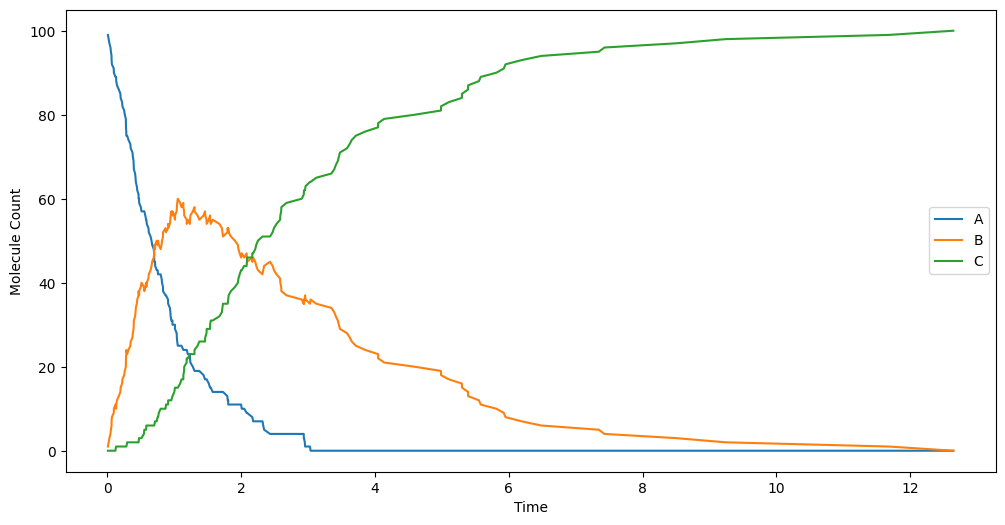

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
rate_A_to_B = 1.0
rate_B_to_C = 0.5
initial_A = 100
initial_B = 0
initial_C = 0
simulation_time = 50.0

# State
state = np.array([initial_A, initial_B, initial_C])

# Reactions
reactions = np.array([
    [-1, 1, 0],  # A --> B
    [0, -1, 1]   # B --> C
])

# Propensities
propensities = np.array([
    rate_A_to_B * state[0],  # A --> B
    rate_B_to_C * state[1]   # B --> C
])

# Initialize time
time = 0.0

# Record state over time
state_over_time = []
times = []

# Gillespie algorithm
while time < simulation_time:
    total_propensity = np.sum(propensities)
    if total_propensity <= 0.0:
        break

    # Time until next reaction
    tau = np.random.exponential(1.0 / total_propensity)
    time += tau

    # Choose next reaction
    reaction = np.random.choice(len(reactions), p=propensities / total_propensity)

    # Update state
    state += reactions[reaction]

    # Update propensities
    propensities = np.array([
        rate_A_to_B * state[0],  # A --> B
        rate_B_to_C * state[1]   # B --> C
    ])

    # Record state
    state_over_time.append(state.copy())
    times.append(time)

# Convert to numpy arrays for easier slicing
state_over_time = np.array(state_over_time)
times = np.array(times)

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(times, state_over_time[:, 0], label="A")
plt.plot(times, state_over_time[:, 1], label="B")
plt.plot(times, state_over_time[:, 2], label="C")
plt.xlabel("Time")
plt.ylabel("Molecule Count")
plt.legend()
plt.show()
